In [ ]:
# WEB SCRAPING NIH - National Library of Medicine

En este caso, entramos en el repositorio de imágenes clínicas de la National Library of Medicine y filtramos por TC de Cáncer de pulmón

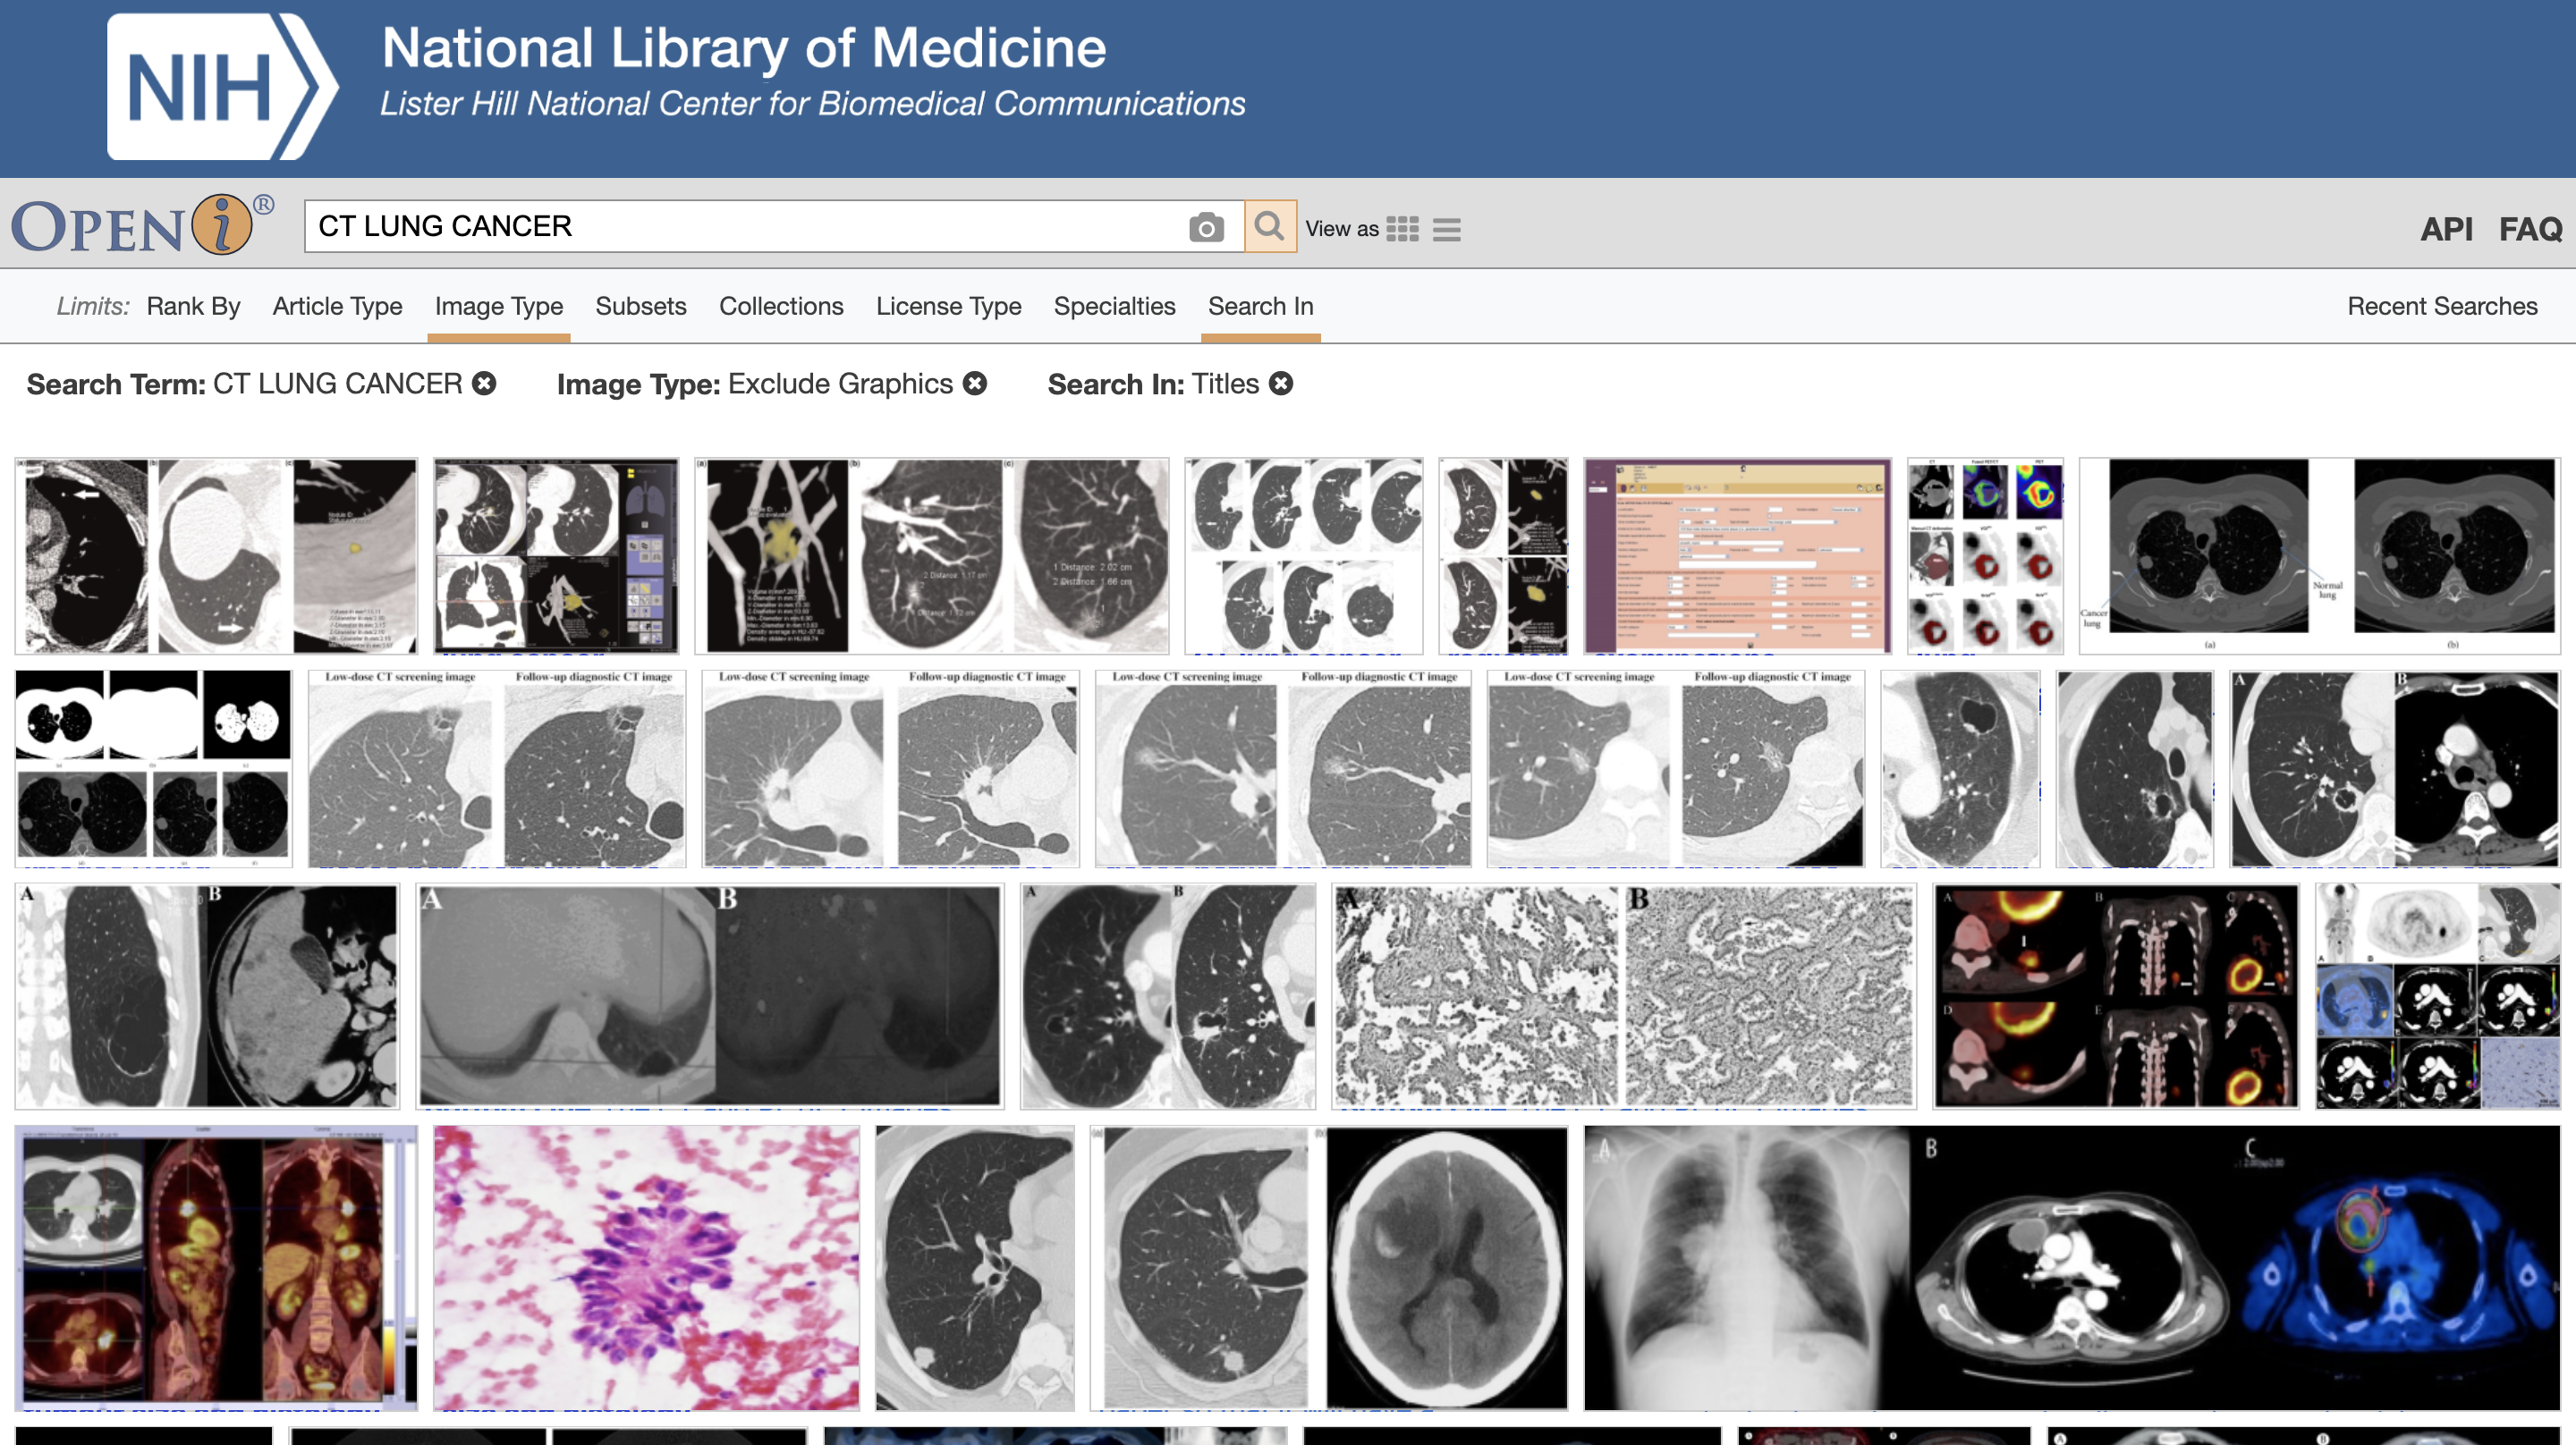

In [25]:
from IPython.display import Image, display

# Ruta a la imagen
image_path = '/Users/sarasalmon/Desktop/NIH.png'
display(Image(filename=image_path))

In [31]:
import pandas as pd
import time # Funciones relacionadas con el tiempo, por ej.pausar ejecución del programa durante un período específico
import requests # Realiza solicitudes HTTP; para descargar contenido de páginas web o interactuar con APIs
import os # Interactua con el sistema operativo, para manejar archivos y directorios


from bs4 import BeautifulSoup # Analiza documentos HTML y XML y extrae información de páginas web
from selenium import webdriver # Para controlar navegadores web a través de Python. Permite automatizar interacciones en páginas web
from selenium.webdriver.chrome.service import Service # Para configurar y manejar el servicio del navegador Chrome- iniciar y detener el controlador de Chrome
from webdriver_manager.chrome import ChromeDriverManager # Permite gestionar automáticamente la instalación del controlador de Chrome - versión correcta del controlador
from selenium.webdriver.chrome.options import Options  # Permite configurar opciones para el navegador Chrome (ejecutar el navegador en modo sin cabeza, configurar tamaños de ventana, etc.)
from selenium.common.exceptions import WebDriverException # Para manejar excepciones específicas que pueden ocurrir al usar Selenium- si hay problemas al iniciar el navegador o al cargar una página
from IPython.display import HTML # Permite mostrar contenido HTML en un Jupyter Notebook o un entorno interactivo de IPython
from urllib.parse import urlparse, parse_qs # Funciones para analizar URLs. 
#urlparse descompone una URL en sus componentes (como esquema, dominio, etc.)
# y parse_qs convierte la cadena de consulta (query string) en un diccionario que puedes usar para extraer parámetros de la URL


# Configuramos las opciones del navegador
options = Options()
# Usamos --headless para que no aparezca la ventana del navegador
options.add_argument("--headless") 

try:
    # Instalación y Configuración del Driver
    # Utilizamos ChromeDriverManager para instalar automáticamente el controlador de Chrome y crear una instancia del navegador.
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service, options=options) 
    

    # Navega a la URL deseada
    # driver.get(url) navega a la página especificada en la URL
    url = "https://openi.nlm.nih.gov/gridquery?q=CT%20LUNG%20CANCER&m=1&n=100&it=xg&fields=t"  
    driver.get(url)

    # Espera 5 segundos para asegurarse de que la página se haya cargado completamente
    time.sleep(5)

    # Imprime el título de la página
    print(driver.title)

    # Se utiliza BeautifulSoup para analizar el HTML que ha sido cargado en el navegador
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    print(soup.prettify())  # Toma el HTML y lo formatea con indentación para que sea más fácil de leer

# Si hay un error al abrir el navegador, se detecta la excepción e imprime un mensaje de error
except WebDriverException as e:
    print(f"Error al abrir el navegador: {e}")
finally:
    driver.quit()

OpeniNgWeb
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   OpeniNgWeb
  </title>
  <base href="/"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="/assets/images/favicon.ico" rel="icon" type="image/ico"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="" name="description"/>
  <meta content="" name="author"/>
  <meta content="" name="keywords"/>
  <meta content="OFgD9P2U1N" name="baidu-site-verification"/>
  <meta content="77520cf3038ed5a2" name="yandex-verification"/>
  <meta content="jpincErNMV_4w__Q9mY-t949fHYFx8xEgL4LM9oRrNw" name="google-site-verification"/>
  <meta content="3CFD723BC959C86D2CF0E81EF5E605ED" name="msvalidate.01"/>
  <link href="" rel="canonical"/>
  <link href="styles-4KF6LWIQ.css" rel="stylesheet"/>
  <style>
   .bg-primary[_ngcontent-ng-c2522

In [3]:
# Hacemos la llamada a la página web
response = requests.get(url)
response.status_code # 200 BIEN!! :)

200

In [5]:
# Probamos a sacar el 'npos' de forma individual para luego incluirlo en el bucle

# Primero sacamos la ruta completa
link_url = soup.find('a', class_='jg-entry')['href']
link_url

'detailedresult?img=PMC3781644_ci13904301&query=CT%20LUNG%20CANCER&fields=t&it=xg&req=4&npos=1'

In [7]:
# Descomponemos la ruta en partes y la convertimos en un diccionario para poder acceder al valor de 'npos'

# Descompone la URL en partes
from urllib.parse import urlparse, parse_qs 

# Extraemos específicamente la parte de consulta de la URL - todo lo que va después del signo de interrogación
parsed_url = urlparse(link_url) 

# Convertimos la consulta en un diccionario
query_params = parse_qs(parsed_url.query)  
query_params

{'img': ['PMC3781644_ci13904301'],
 'query': ['CT LUNG CANCER'],
 'fields': ['t'],
 'it': ['xg'],
 'req': ['4'],
 'npos': ['1']}

In [9]:
# Obtenemos el valor de 'npos' de forma individual y a continuación lo incluimos en el bucle
npos_value = query_params.get('npos')[0]  # Toma el primer valor o None
npos_value

'1'

In [13]:
# Creamos lista para almacenar los links de las imágenes 
images_link = []  

# Buscamos todos los enlaces en el HTML
link_tags = soup.find_all('a', class_='jg-entry')

# Iteramos sobre los posibles valores de npos 
for desired_npos in range(1, 101):  
    # Inicializamos variable para la URL de la imagen
    img_url = None
    # Iteramos sobre los enlaces encontrados
    for link_tag in link_tags:
        # Obtenemos el valor del atributo href
        link_url = link_tag['href']
        # Analizamos la URL para extraer el valor de 'npos'
        parsed_url = urlparse(link_url)
        query_params = parse_qs(parsed_url.query)
        # Verificamos si el valor de npos coincide
        if query_params.get('npos', [None])[0] == str(desired_npos):
            # Obtenemos la URL de la imagen
            img_tag = link_tag.find('img')  # Buscar el <img> dentro del <a>
            if img_tag:
                img_url = img_tag['src']  # Extraer la URL de la imagen
                print(f'URL de la imagen para npos={desired_npos}: {img_url}')
                images_link.append(img_url)  # Agregar la imagen a la lista
                break  # Salimos del bucle una vez encontrada la imagen
    if img_url is None:
        print(f'No se encontró la imagen para npos={desired_npos}.')

URL de la imagen para npos=1: https://openi.nlm.nih.gov/imgs/150/214/3781644/PMC3781644_ci13904301.png
URL de la imagen para npos=2: https://openi.nlm.nih.gov/imgs/150/214/3781644/PMC3781644_ci13904302.png
URL de la imagen para npos=3: https://openi.nlm.nih.gov/imgs/150/214/3781644/PMC3781644_ci13904303.png
URL de la imagen para npos=4: https://openi.nlm.nih.gov/imgs/150/214/3781644/PMC3781644_ci13904304.png
URL de la imagen para npos=5: https://openi.nlm.nih.gov/imgs/150/214/3781644/PMC3781644_ci13904307.png
URL de la imagen para npos=6: https://openi.nlm.nih.gov/imgs/150/214/3781644/PMC3781644_ci13904308.png
URL de la imagen para npos=7: https://openi.nlm.nih.gov/imgs/150/142/3502476/PMC3502476_2191-219X-2-56-3.png
URL de la imagen para npos=8: https://openi.nlm.nih.gov/imgs/150/398/4587437/PMC4587437_IJBI2015-230830.002.png
URL de la imagen para npos=9: https://openi.nlm.nih.gov/imgs/150/398/4587437/PMC4587437_IJBI2015-230830.004.png
URL de la imagen para npos=10: https://openi.nlm.

In [121]:
# Creamos el directorio donde se guardarán las imágenes
save_directory = 'imagenes_pubmed'
os.makedirs(save_directory, exist_ok=True)

In [123]:
# Descargamos y guardamos cada imagen
for i, img_url in enumerate(images_link):
    try:
        # Realizamos una solicitud GET para obtener la imagen
        img_response = requests.get(img_url)
        img_response.raise_for_status()  # Lanza un error si la solicitud fue fallida

        # Obtenemos el nombre de la imagen desde la URL
        img_name = os.path.basename(img_url)  # Extraer el nombre del archivo de la URL
        img_path = os.path.join(save_directory, img_name)

        # Guardamos la imagen en el directorio
        with open(img_path, 'wb') as f:
            f.write(img_response.content)
            print(f"Imagen guardada como: {img_path}")
    except requests.exceptions.RequestException as e:
        print(f"Error al descargar la imagen {img_url}: {e}")

Imagen guardada como: imagenes_pubmed/PMC3781644_ci13904301.png
Imagen guardada como: imagenes_pubmed/PMC3781644_ci13904302.png
Imagen guardada como: imagenes_pubmed/PMC3781644_ci13904303.png
Imagen guardada como: imagenes_pubmed/PMC3781644_ci13904304.png
Imagen guardada como: imagenes_pubmed/PMC3781644_ci13904307.png
Imagen guardada como: imagenes_pubmed/PMC3781644_ci13904308.png
Imagen guardada como: imagenes_pubmed/PMC3502476_2191-219X-2-56-3.png
Imagen guardada como: imagenes_pubmed/PMC4587437_IJBI2015-230830.002.png
Imagen guardada como: imagenes_pubmed/PMC4587437_IJBI2015-230830.004.png
Imagen guardada como: imagenes_pubmed/PMC3755805_40064_2013_463_Fig1_HTML.png
Imagen guardada como: imagenes_pubmed/PMC3755805_40064_2013_463_Fig2_HTML.png
Imagen guardada como: imagenes_pubmed/PMC3755805_40064_2013_463_Fig3_HTML.png
Imagen guardada como: imagenes_pubmed/PMC3755805_40064_2013_463_Fig4_HTML.png
Imagen guardada como: imagenes_pubmed/PMC4063653_OL-08-01-0285-g00.png
Imagen guardada c

### CONCLUSIÓN: Se han descargado las imágenes correctamente
#### Próximos pasos: Explorar el resto de páginas, de forma automatizada o manual y seguir recopilando imágenes con las que poder entrenar el modelo de Machine Learning para el diagnóstico del cáncer de pulmón.